In [100]:
% when running localy
path_to_spm = '/home/remi/matlab/SPM/spm12/';
addpath(path_to_spm)

Adapted from https://github.com/Remi-Gau/advanced_fMRI_course/blob/master/Practical%232/practical_2.m

Small helper function to help us plot the axis

In [101]:
function set_axis(h, leg, MAX)

    % baseline
    plot([0 MAX], [0 0], 'k');

    linewidth = 4;
    for i = 1:numel(h)
        set(h(i), 'linewidth', linewidth)
    end

    t = legend(leg);
    set(t, 'fontsize', 12);

    ax = axis;
    ax(2) = MAX;
    axis(ax);

    set(gca, 'xtick', 0:50:MAX , ...
             'xticklabel', 0:5:(MAX/10), ...
             'fontsize', 14)
    xlabel('time (s)')

end

### Create impulse response

In [102]:
onset_vector = zeros(330,1);
onset_vector(1) = 1;

% onset_vector(80) = 1;

### Define HRF

In [103]:
% Gives the shape of the HRF with a sampling frequency of 1 Hz
HRF = spm_hrf(.1); 

% Temporal resolution in seconds of the informed basis set you are going to create
xBF.dt = .1; 
xBF.name = 'hrf (with time and dispersion derivatives)';

% Length of the HRF in seconds
xBF.length = 33;
xBF.order = 1;

% Creates the informed basis set
xBF = spm_get_bf(xBF); 

canonical_HRF = xBF.bf(:,1);
temporal_derivative = xBF.bf(:,2);
dispersion_derivative = xBF.bf(:,3);

### Convolve impulse response with HRF

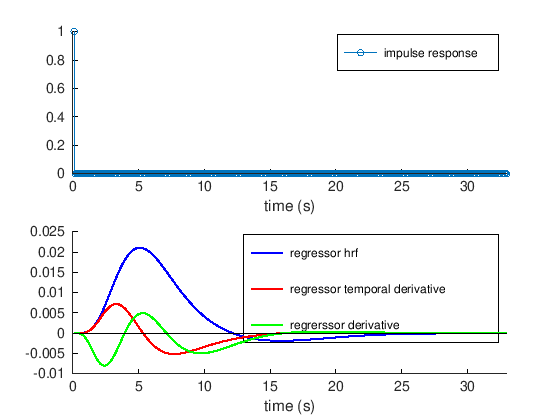

In [104]:
regressor_hrf = conv(canonical_HRF, onset_vector);
regressor_temp = conv(temporal_derivative, onset_vector);
regressor_disp = conv(dispersion_derivative, onset_vector);


subplot(211)
hold on

stem(onset_vector);

LEGEND={'impulse response'};
set_axis([], LEGEND, length(onset_vector))


subplot(212)
hold on

h(1) = plot(regressor_hrf(1:length(onset_vector)), 'b');
h(2) = plot(regressor_temp(1:length(onset_vector)), 'r');
h(3) = plot(regressor_disp(1:length(onset_vector)), 'g');

LEGEND={'regressor hrf'; ...
        'regressor temporal derivative'; ...
        'regrerssor derivative'};
set_axis(h, LEGEND, length(onset_vector))

### Design matrix

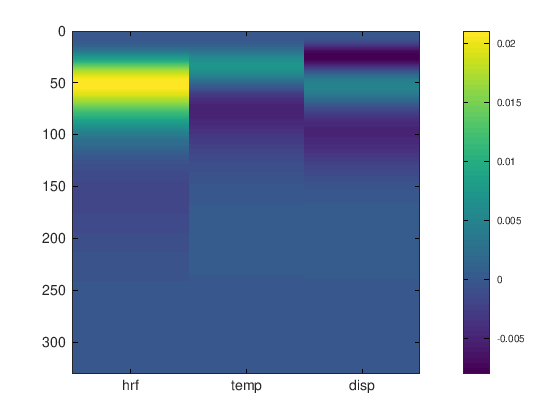

In [105]:
X = [regressor_hrf, regressor_temp, regressor_disp];

% h(1) = plot(regressor_hrf(1:length(onset_vector)), 'b');

imagesc(X(1:length(onset_vector),:))
colorbar
set(gca, 'xtick', [1 2 3] , ...
         'xticklabel', {'hrf', 'temp', 'disp'}, ...
         'fontsize', 14)

### Effects of HRF derivatives

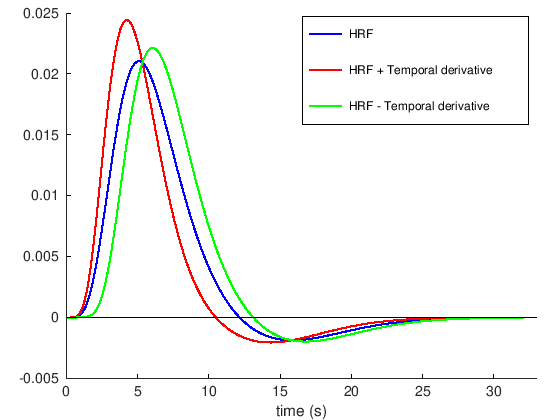

In [106]:
hold on

h(1) = plot(canonical_HRF, 'b');
h(2) = plot(canonical_HRF + temporal_derivative, 'r');
h(3) = plot(canonical_HRF - temporal_derivative, 'g');

LEGEND={'HRF'; ...
        'HRF + Temporal derivative'; ...
        'HRF - Temporal derivative'};
set_axis(h, LEGEND, length(onset_vector))

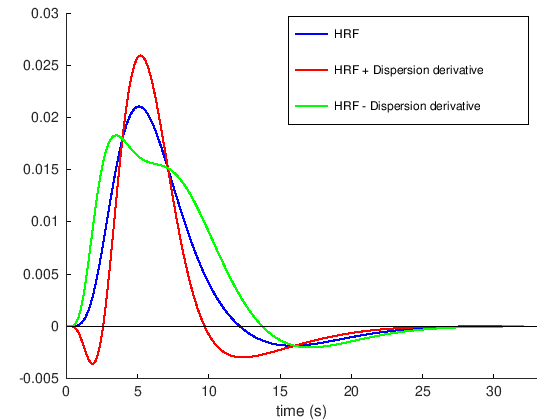

In [107]:
hold on 

h(1) = plot(canonical_HRF, 'b');
h(2) = plot(canonical_HRF + dispersion_derivative, 'r');
h(3) = plot(canonical_HRF - dispersion_derivative, 'g');

LEGEND={'HRF'; ...
        'HRF + Dispersion derivative'; ...
        'HRF - Dispersion derivative'};
set_axis(h, LEGEND, length(onset_vector))